# Ethereum Data Analysis

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [6]:
crypt_df = pd.read_csv("ethereum.csv", parse_dates=['Date'])

In [7]:
crypt_df.head()

,Date,Supply,MarketCap,Price,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
0,2015-07-30,72049306.59,0.0,0,9205,8893,0.0,0,644,39316.09375,0.121
1,2015-07-31,72085498.31,0.0,0,9361,0,0.0,0,582,36191.71875,0.603
2,2015-08-01,72113204.25,0.0,0,9476,0,0.0,0,575,27705.93750,0.887
3,2015-08-02,72141427.69,0.0,0,9563,0,0.0,0,581,28223.43750,1.020
4,2015-08-03,72169404.41,0.0,0,9639,0,0.0,0,587,27976.71875,1.126


In [15]:
crypt_df.tail()

,Date,Supply,MarketCap,Price,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
1159,2018-10-01,102309434.8,23622.22541,230.89,43504621,476308,1.894101e+10,38550173670,24593,20302.40625,3240.653
1160,2018-10-02,102329949.0,23066.19381,225.41,43554108,490262,1.903487e+10,39210756138,24107,20514.18750,3211.925
1161,2018-10-03,102350244.5,22513.98328,219.97,43618192,559006,1.324871e+10,40441198221,21423,20295.46875,3226.085
1162,2018-10-04,102370614.1,22701.70739,221.76,43680143,559181,1.325410e+10,40791755826,22655,20369.62500,3261.753
1163,2018-10-05,102390791.2,23334.86131,227.90,43750049,595361,1.356843e+10,39567592626,20849,20177.06250,3277.001


We use the *parse_dates* attributes of pd.read_csv to read the 'Date' column as datetime object. Let's find out how many data samples and features we have in our dataset. The dataset is a collection of daily data of ethereum network for almost three years (2015 to 2018). 

In [8]:
crypt_df.shape

(1164, 11)

In [10]:
crypt_df.dtypes

Date               datetime64[ns]
Supply                    float64
MarketCap                 float64
Price                      object
Addresses                   int64
Transactions                int64
GasPriceHistory           float64
GasConsumed                 int64
BlockSize                   int64
BlockRewards              float64
BlockDifficulty           float64
dtype: object

Only the feature 'Price' is of object type. Let's look at some values of this feature.

In [11]:
# unique values in the feature 'Price'
crypt_df['Price'].unique()[:10]

array(['0', '3', '1.2', '0.99', '1.29', '1.88', '1.79', '1.3', '1.37',
       '1.36'], dtype=object)

Clearly, we should convert these values from object type to float type.

In [12]:
# convert from object type to float type. Remove ',' if present and then convert to float
crypt_df['Price'] = crypt_df['Price'].apply(lambda x: float(re.sub(',', '', x)))

ETH is the lifeblood of Ethereum. When you send ETH or use an Ethereum application, you'll pay a small fee in ETH to use the Ethereum network. This fee is an incentive for a miner to process and verify what you're trying to do.

Miners are like the record-keepers of Ethereum – they check and prove that no one is cheating. Miners who do this work are also rewarded with small amounts of newly-issued ETH.

The work miners do keeps Ethereum secure and free of centralized control.

Source : https://ethereum.org/en/eth/

The following information about the features are available:

- Supply - total number of ether (digital currency of ethereum network) in circulation.

- Price - market price (close) of ethereum cryptocurrency.

- Market Cap - it is calculated as (supply * price). In simple terms, it is the market value of a company.

- Addresses - total number of unique addresses. It basically gives us an idea about how many pepople are getting involved on the ethereum platform.

- Transactions - total number of daily transactions on ethereum platform.

- GasPriceHistory - price of making a transaction on ethereum platform.

- GasConsumed - amount of gas consumed during executing the transactions.

- Block Size - Ethereum imposes a gas limit instead of a block size, helps manage growth of the network; if block size is too large and network grows too large then there's fear the network will be more centralized because of increased cost of running full node (among other concerns) 

- Block Rewards - It is the total amount of Ether (ETH) given to the address which mined this block. In other words, it is the rewards given to the miners for verifying transactions (https://docs.ethhub.io/using-ethereum/mining/).

- Block Difficulty - hashes needed for miners to solve blocks, as more miners join network the difficulty goes up so blocks aren't mined too fast 

## Exploratory data analysis 

In [13]:
def plot_features(df, feature1, feature2, fig_width, fig_height, log_scale=False):
    
    """
    A function to generate plots.
    
    Parameters
    ------------
    df : pandas dataframe
       the input dataframe
       
    feature1 : str
       the feature to be plotted along the x-axis
       
    feature2 : str
       the feature to be plotted along the y-axis
       
    fig_width : int
       width of the figure
       
    fig_height : int
       height of the figure
       
    log_scale : bool
       specifies whether to set log scale along an axis
       
    Returns
    ---------
    None
    
    """
    
    plt.figure(figsize=(fig_width, fig_height))
    plt.plot(df[feature1], df[feature2])
    if log_scale:
        plt.yscale("log")

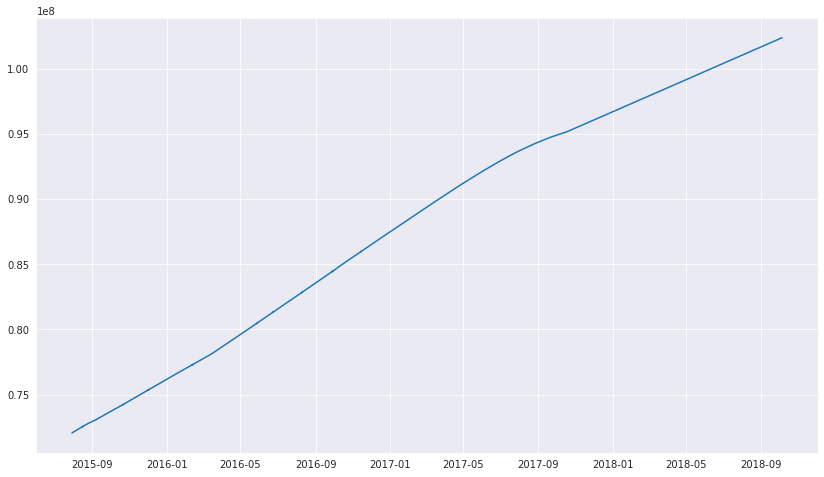

In [52]:
# how does the supply of ether have changed over time?
plot_features(crypt_df, 'Date', 'Supply', 14, 8)

So between 2015 and 2018, the total circulation of ether has seen a steady increase.

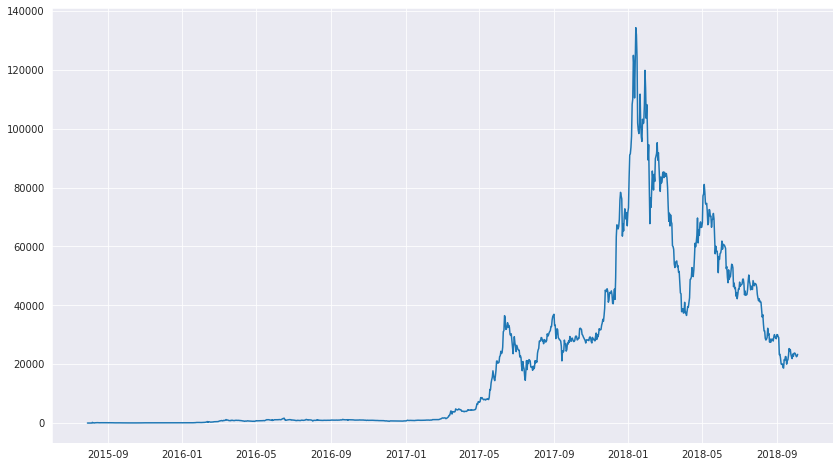

In [14]:
# what about the market value of ethereum
plot_features(crypt_df, 'Date', 'MarketCap', 14, 8)

The market value of ethereum, however, has been through ups and downs. The highest market capitalization was during the month of February/March in 2018. After May, 2018 (the second peak in capitalization value), the market value is seen to decrease.

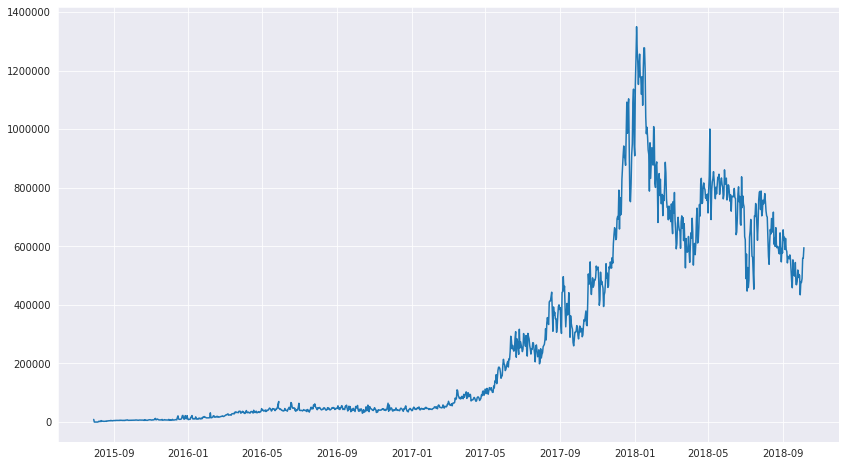

In [16]:
# what is the transaction rate?
plot_features(crypt_df, 'Date', 'Transactions', 14, 8)

The transaction rate on ethereum platform shows a very similar pattern as that of the market capitalization. The transaction rate was the highest when the market cap was also at the peak.

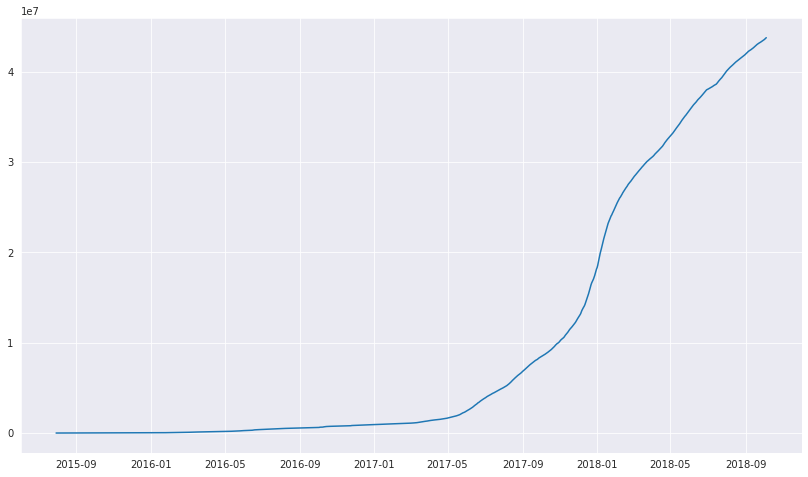

In [17]:
# is ethereum getting popular over time?
plot_features(crypt_df, 'Date', 'Addresses', 14, 8)

The data suggests that ethereum has seen a steady increase in the total number of users over time. 

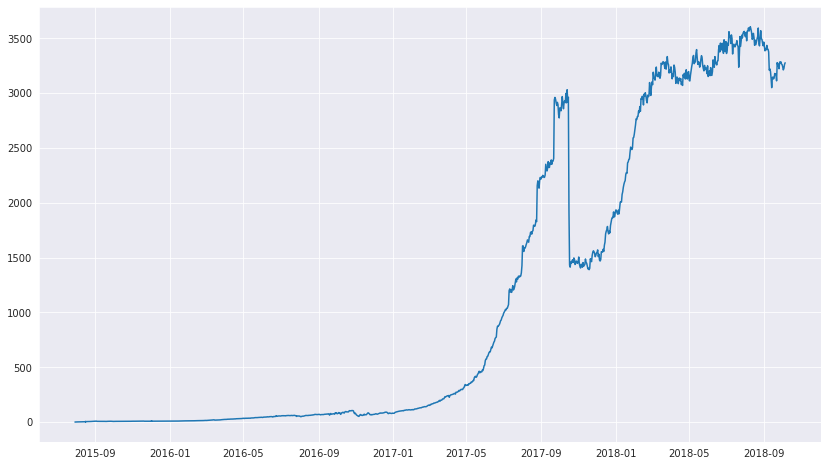

In [19]:
# how difficult is it getting to mine a block?
plot_features(crypt_df, 'Date', 'BlockDifficulty', 14, 8)

Therefore on average, the mining difficulty associated with blocks in the ethereum space has incresed over time. This, in turn, keeps the total circulation of cryptocurrencies in check. In this context, it is interesting to see how the incentives of miners (*i.e.*, block rewards) has changed ovet time.

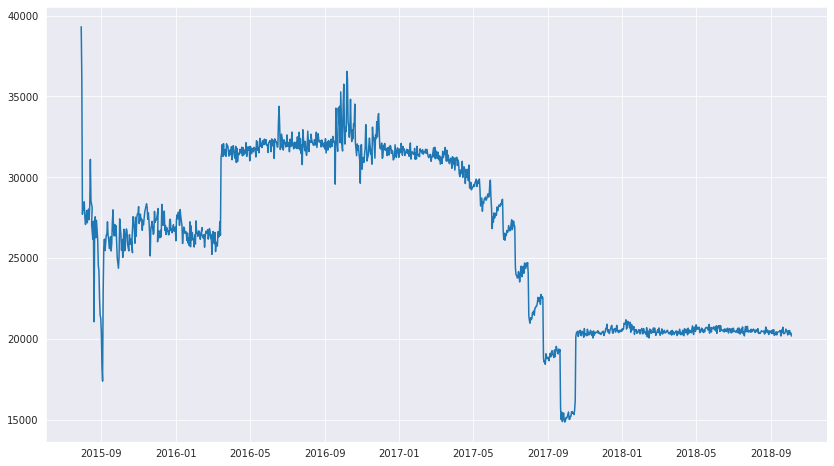

In [20]:
# block rewards as a funtion of time
plot_features(crypt_df, 'Date', 'BlockRewards', 14, 8)

The block rewards given to a miner for mining a block has decreased over time. From the end of the year 2017 till the end of 2018, it has remained steady at the value 20k (in ether unit). The lowest (in the available data period) so far has been around 15k.

Now, the value of block reward includes the total block reward issued by the protocol combined with the fees/gas paid by all the transactions included in this block (https://docs.ethhub.io/using-ethereum/mining/). The gas price for each transaction is set by users. Can we use this information to find out what is actually causing the decline in block reward?

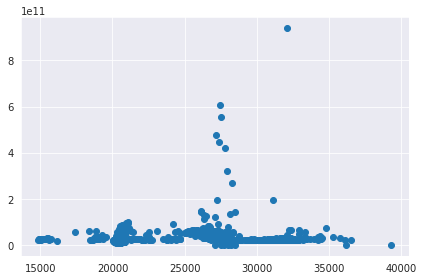

In [23]:
plt.scatter(x='BlockRewards', y='GasPriceHistory', data=crypt_df)
plt.tight_layout()

Clearly, over the entire available block reward range, there is not much fluctuation in the gas price. So it might be indicative that rewards issued by the protocol itself has decreased over time.

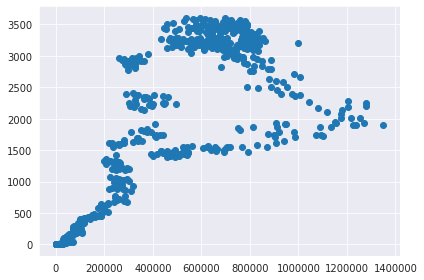

In [35]:
# 
plt.scatter(x='Transactions', y='BlockDifficulty', data=crypt_df)
plt.tight_layout()

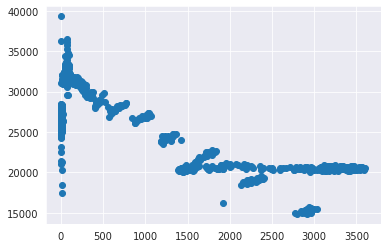

In [37]:
plt.scatter(x='BlockDifficulty', y='BlockRewards', data=crypt_df)

In [38]:
crypt_df['BlockDifficulty'].max()

3606.0359999999996

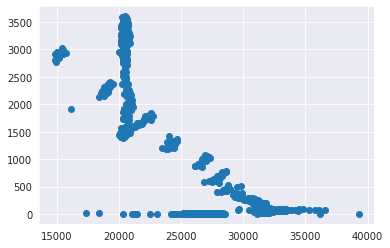

In [39]:
plt.scatter(y='BlockDifficulty', x='BlockRewards', data=crypt_df)

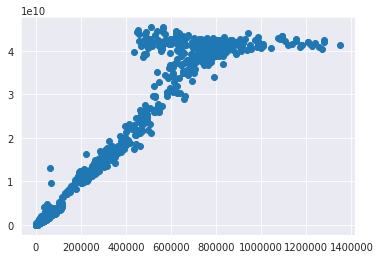

In [40]:
plt.scatter(x='Transactions', y='GasConsumed', data=crypt_df)

(0, 200000000000.0)

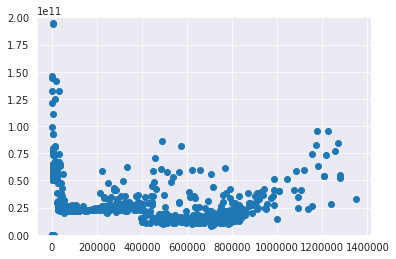

In [44]:
plt.scatter(x='Transactions', y='GasPriceHistory', data=crypt_df)
plt.ylim(0, 2e+11)

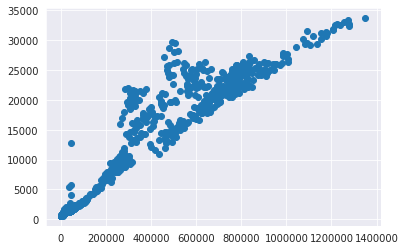

In [50]:
plt.scatter(x='Transactions', y='BlockSize', data=crypt_df)

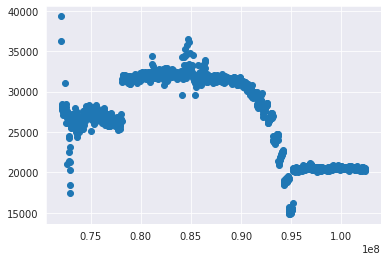

In [51]:
plt.scatter(x='Supply', y='BlockRewards', data=crypt_df)

In [46]:
crypt_df.columns

Index(['Date', 'Supply', 'MarketCap', 'Price', 'Addresses', 'Transactions',
       'GasPriceHistory', 'GasConsumed', 'BlockSize', 'BlockRewards',
       'BlockDifficulty'],
      dtype='object')

In [48]:
corr_df = crypt_df.corr()

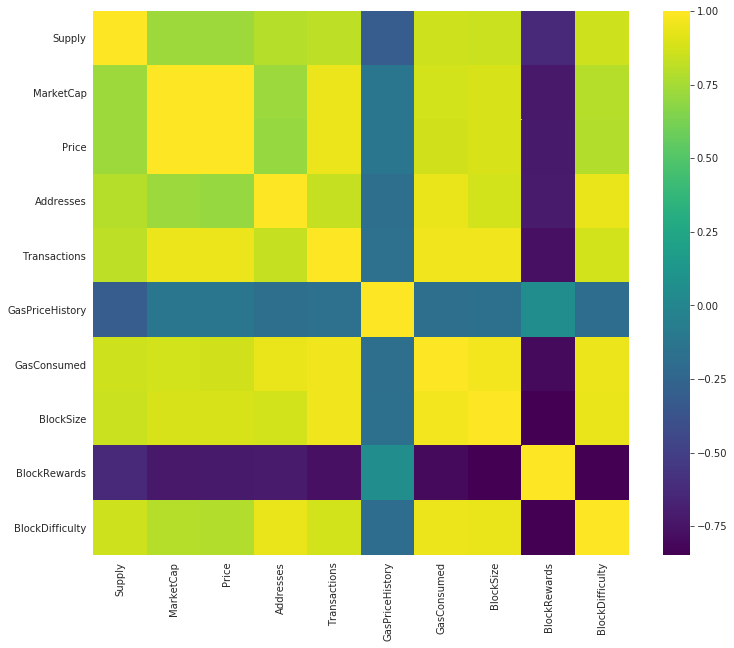

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, cmap="viridis")

In [53]:
corr_df

,Supply,MarketCap,Price,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
Supply,1.000000,0.731283,0.728379,0.793912,0.815057,-0.312725,0.857434,0.853401,-0.631773,0.860284
MarketCap,0.731283,1.000000,0.999717,0.724672,0.946737,-0.123989,0.875785,0.890675,-0.724260,0.793088
Price,0.728379,0.999717,1.000000,0.711027,0.943264,-0.123331,0.868550,0.886383,-0.721866,0.784665
Addresses,0.793912,0.724672,0.711027,1.000000,0.836089,-0.176400,0.937681,0.876131,-0.714369,0.937610
Transactions,0.815057,0.946737,0.943264,0.836089,1.000000,-0.161602,0.958794,0.963538,-0.774164,0.870721
GasPriceHistory,-0.312725,-0.123989,-0.123331,-0.176400,-0.161602,1.000000,-0.179435,-0.173436,0.054930,-0.195574
GasConsumed,0.857434,0.875785,0.868550,0.937681,0.958794,-0.179435,1.000000,0.968592,-0.801806,0.943389
BlockSize,0.853401,0.890675,0.886383,0.876131,0.963538,-0.173436,0.968592,1.000000,-0.844518,0.937495
BlockRewards,-0.631773,-0.724260,-0.721866,-0.714369,-0.774164,0.054930,-0.801806,-0.844518,1.000000,-0.846493
BlockDifficulty,0.860284,0.793088,0.784665,0.937610,0.870721,-0.195574,0.943389,0.937495,-0.846493,1.000000


In [11]:
X = crypt_df.drop(['Date', 'Price', 'MarketCap'], axis=1)
y = crypt_df['MarketCap'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((931, 8), (233, 8))

In [13]:
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()

X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

y_train_scaled = scaler_test.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler_test.transform(y_test.reshape(-1,1))

In [15]:
y_train_scaled.min(), y_train_scaled.max()

(0.0, 1.0)

In [16]:
y_test_scaled.min(), y_test_scaled.max()

(0.0, 0.9300421123176867)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
pred = model.predict(X_test_scaled)

In [19]:
rmse_test = mean_squared_error(y_true=y_test_scaled, y_pred=pred, squared=False)
r2_test = r2_score(y_test_scaled, pred)
rmse_test, r2_test

(0.057238823663354574, 0.9255858770162446)

In [21]:
rmse_train = mean_squared_error(y_true=y_train_scaled, y_pred=model.predict(X_train_scaled), squared=False)
r2_train = r2_score(y_train_scaled, model.predict(X_train_scaled))
rmse_train, r2_train

(0.05594893935736097, 0.925083932413406)

In [25]:
model.coef_.shape

(1, 8)

In [29]:
X.columns

Index(['Supply', 'Addresses', 'Transactions', 'GasPriceHistory', 'GasConsumed',
       'BlockSize', 'BlockRewards', 'BlockDifficulty'],
      dtype='object')

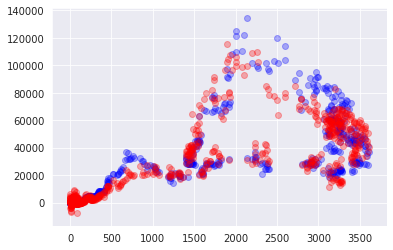

In [87]:
plt.scatter(X_train.iloc[:, [7]], y_train, color='blue', alpha=0.3)
plt.scatter(X_train.iloc[:, [7]], model.predict(X_train), color='red', alpha=0.3)

In [95]:
X_train.head()

,Supply,Addresses,Transactions,GasPriceHistory,GasConsumed,BlockSize,BlockRewards,BlockDifficulty
867,96322483.91,14409069,909631,3.863150e+10,41625003479,26216,20606.34375,1612.737
619,90567128.63,1453300,74557,2.196366e+10,2602180314,2358,30242.03125,253.175
355,82150765.50,455066,44184,2.181738e+10,1362771496,1502,31773.90625,60.393
45,73225627.22,21252,6057,5.231352e+10,177583552,764,26171.40625,7.022
1003,99109892.84,32638912,775321,1.758246e+10,37348503833,24555,20268.00000,3128.856


In [31]:
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train_scaled)
X_test_poly = poly_feat.transform(X_test_scaled)

In [32]:
X_train_poly.shape

(931, 45)

In [33]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
poly_pred = poly_reg.predict(X_test_poly)

In [35]:
rmse_train_poly = mean_squared_error(y_true=y_train_scaled, y_pred=poly_reg.predict(X_train_poly), squared=False)
r2_train_poly = r2_score(y_train_scaled, poly_reg.predict(X_train_poly))
rmse_train_poly, r2_train_poly

(0.034433752557249515, 0.9716234256637841)

In [36]:
rmse_test_poly = mean_squared_error(y_true=y_test_scaled, y_pred=poly_pred, squared=False)
r2_test_poly = r2_score(y_test_scaled, poly_pred)
rmse_test_poly, r2_test_poly

(0.03378014915145981, 0.9740822620993153)

In [116]:
import statsmodels.regression.linear_model as sm

In [111]:
X_new = np.append(np.ones(shape=(X.shape[0], 1)).astype(int), X, axis=1)
X_new.shape

(1164, 9)

In [113]:
#X_new

In [117]:
X_opt = X_new[:, [0,1,2,3,4,5,6,7,8]]
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MarketCap   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1791.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:04:20   Log-Likelihood:                -12044.
No. Observations:                1164   AIC:                         2.411e+04
Df Residuals:                    1155   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.749e+04   4486.498      3.899      0.000    8690.700    2.63e+04
x1            -0.0005   6.48e-05     -8.106      0.000      -0.001      -0.000
x2            -0.0011   8.07e-05    -13.362      0.000      -0.001      -0.001
x3             0.1148      0.004     30.243      0.000       0.107       0.122
x4          1.055e-08   5.14e-09      2.052      0.040    4.62e-10    2.06e-08
x5          2.354e-07   1.12e-07      2.097      0.036    1.51e-08    4.56e-07
x6            -1.0753      0.139     -7.737      0.000      -1.348      -0.803
x7             0.7579      0.118      6.401      0.000       0.526       0.990
x8            13.6490      0.983     13.885      0.000      11.720      15.578
==============================================================================
Omnibus:                      310.027   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.825
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       8.765   Cond. No.                     1.17e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [120]:
pred_dt = model_dt.predict(X_test)

In [121]:
rmse_train_dt = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model_dt.predict(X_train), squared=False))
r2_train_dt = r2_score(y_train, model_dt.predict(X_train))
rmse_train_dt, r2_train_dt

(0.0, 1.0)

In [124]:
rmse_test_dt = np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred_dt))
r2_test_dt = r2_score(y_test, pred_dt)
rmse_test_dt, r2_test_dt

(4074.0794216532054, 0.9806111692473931)